In [4]:
%matplotlib inline

# LAB 9 - Mussels, fish and macroalgae (Multi-Trophic Integrated Aquaculture)

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

----------------------------------------

**Rendered link:** http://nbviewer.jupyter.org/urls/bitbucket.org/Diego_Ibarra/aquaculturemodelling2017/raw/tip/Week9/Lab%209%20-%20Mussels,%20fish%20and%20macroalage.ipynb

--------------------------------------



### Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab9</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab9</span>:
   * <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing_fishMacroalgae.py</span>
   * <span class='file'>forcing.py</span>
   * <span class='file'>plot_experiment.py</span>
   * <span class='file'>Nitrate.csv</span>
   * <span class='file'>PhyZooSDetLDet.csv</span>
   * <span class='file'>TempSaltOxy.csv</span>
   
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab9</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


In this lab we will be using a new model that builds on last week's model. The new model, <span class='file'>model_NPZD2_SHELLE_openBoundary_withForcing_fishMacroalgae.py</span>, includes aquacultured fish and macroalgae (in adition to the mussels and NPZD2).

The new model is parameterized so that the aquaculture fish behave like Steelhead Trout (*Oncorhynchus mykiss*) and the macroalgae behaves like kelp (*Saccharina longicruris*). The default parameters of the new model are:

```
    # Aquaculture fish
    par['fepsilon'] = 0.92 # Feeding efficiency on artificial food (dimensionless)
    par['fIE'] = 0.95 # Ingestion efficiency on artificial food (dimensionless)
    par['fAE']= 0.885 # Absorption efficiency on artificial food (dimensionless)
    par['ffeeing_rate'] = 0.0085 # Artificial food delivery rate (feeding)  (d-1)
    par['fM'] = 0.001225 # Weight-specific maintenance respiration rate (d-1)
    par['fbeta'] = 0.44 # Cost of growth coefficient (dimensionless)
    # Macroalage
    par['Aalpha'] = 12.52 # Initial slope  of P/I curve
    par['Apmax'] = 45 # Maximum photosynthesis rate 
    par['AKNO3'] = 5 # Half-saturation for NO3 (mmol N m-3)
    par['AKNH4'] = 12.7 # Half-saturation for NH4 (mmol N m-3)
    par['Amu_max'] = 0.09 # Maximum growth rate (d-1)
    par['APsi'] = 0.006 # Erosion rate (d-1)
```

The default initial conditions are:

```
    # Aquaculture fish
    InitCond['fish'] = 1104.0 # Initial biomass per individual (mmol N ind-1)
    InitCond['n_fish']= 1 #Initial number of individuals per grid cell (number of fish)
    # Macroalage    
    InitCond['Algae'] = 5.0 # Initial biomass per individual (mmol N ind-1)
    InitCond['n_Algae']= 1 #Initial number of individuals per grid cell (number of Alage)
```

------

# Test run

First, lets do a quick model run of the new model to make sure all works. In this case, we'll setup the physical dimensions of the model so that the model resembles a tank (10 x 10 x 2 m) with no water exchange. 

<div class="c2c"></div>

Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!


C:\Users\Diego\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


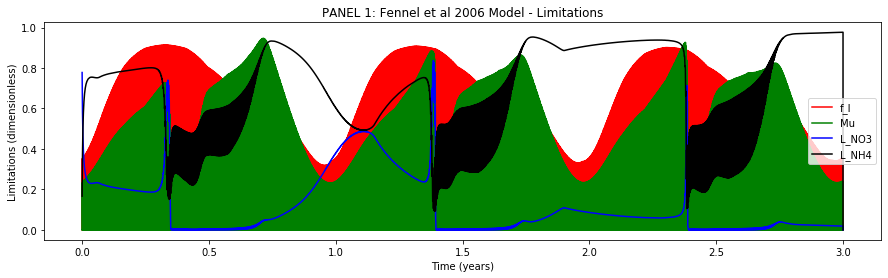

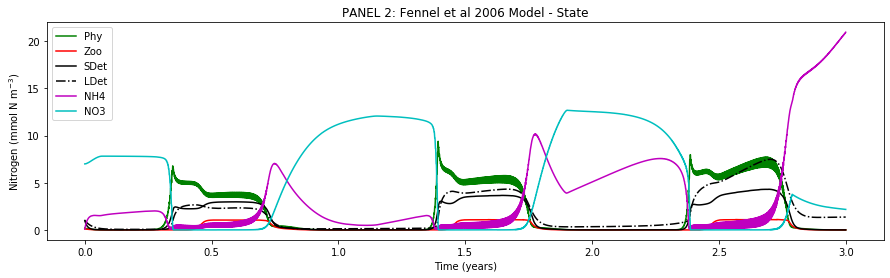

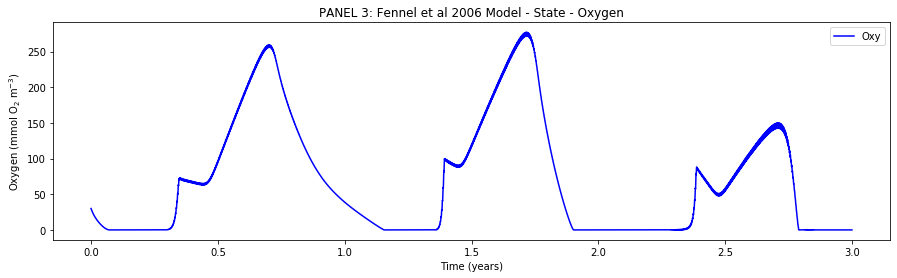

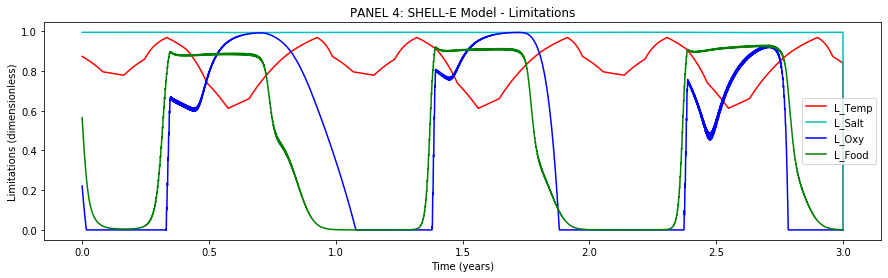

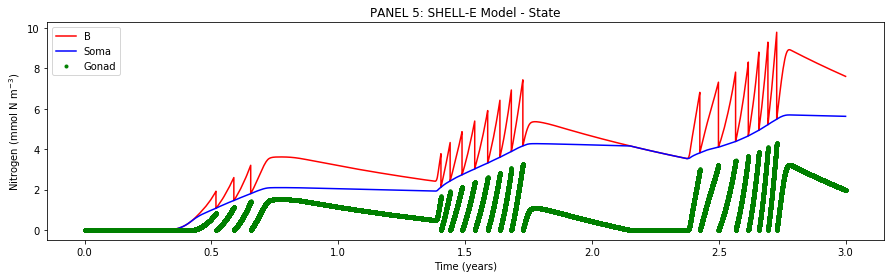

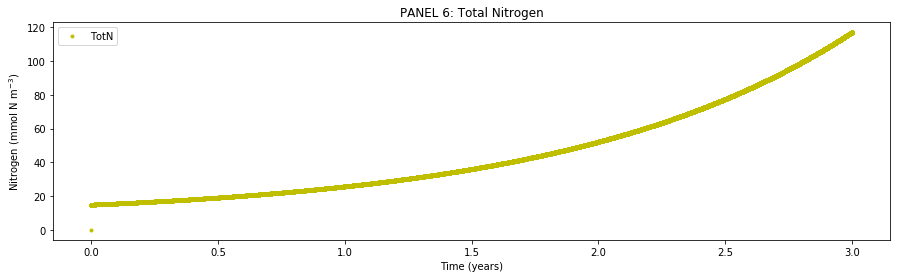

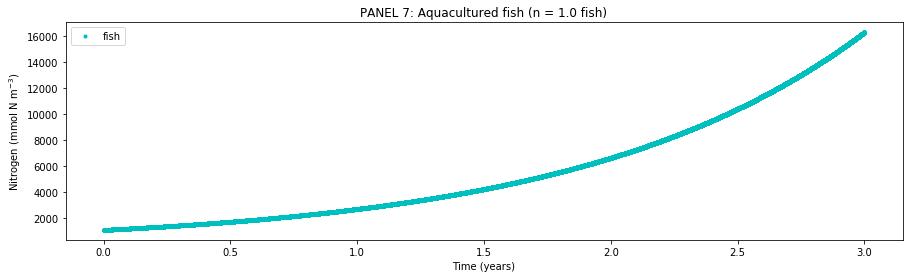

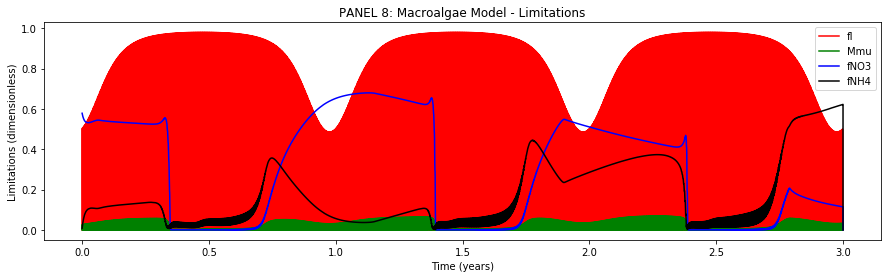

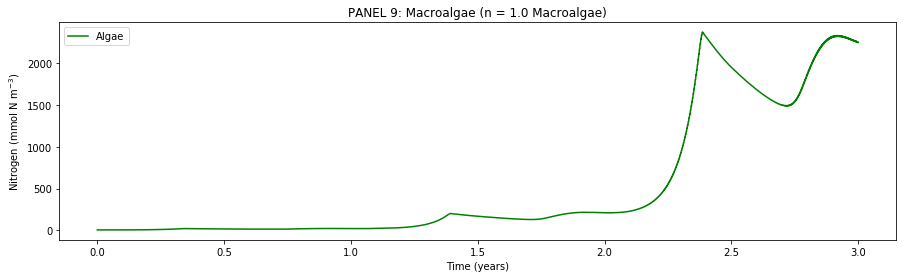

In [5]:
import model_NPZD2_SHELLE_openBoundary_withForcing_fishMacroalgae as model
import forcing

days, dt, par, InitCond = model.load_defaults() #Load defaults
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults ---------------
par['chi']  = 0.0 # No exchange of water in tank
par['X'] = 10. # Basin length
par['Y'] = 10. # Basin width
par['Z'] = 2. # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
InitCond['n_muss'] = 1.
InitCond['n_fish']= 1.
InitCond['n_Algae']= 1.
# ----------------------------------------

# Run model ------------------------------
test = model.run(days,dt,InitCond,par,forc) # Run model
model.plot(test) # Plot model

### Total Nitrogen
Note that `TotN` is not constant. This is ok in this case. `TotN` is not constant because we keep adding fish feed, which is an external input.

### Fish
Our trout simply grows exponentially. This fish model is very simple and it doesn't have any limitations coded-in. therefore the concentration of oxygen, ammonia, etc., do not have any impact on the growth of the fish. Also, food is not limited. They get to each everyday a specified ration. The result is fish that grow exponentially.

### Macroalgae
The macro-algae submodel does have limitations for light and nutrients (NO3 and NH4). You can see the limitations in panel 8. As you can see, kelp is mainly nutrient limited in the summer.

In panel 9, you can see the macroalgae biomass (i.e. `Algae`) grow and erode over the years. 

---------------------

# Experiment 1: Embayment with trout (NO mussels and NO kelp)

Here we'll change the physical dimensions of our model to represent an embayment.

Then we'll compute the **Production Carrying Capacity** and **Ecological Carrying Capacity** on this case study.

The physical dimensions of the embayment are:

* Length: 2000 m
* Width: 100 m
* Depth: 10 m

Also, the exchange rate with the open ocean is as follows...

* Exchange rate: 0.001 (units: replacement of embayment volume per day)

Finally, the number of trouts, mussels and kelps are as follows:

* Trout: Varies (because we want to estimate the Carrying Capacities)
* Mussels: 0
* Kelp: 0

Make a new file named <span class="file">Exp1_Embayment_Trout.py</span>, save it in your working directory, add the code to run your experiment and <span class="run"></span> it.

Note that there are new plotting functions with the suffix "FISH": 

```
pexp.densityVSproductionFISH(multioutput,optimum=0.)
pexp.densityVSoxygenFISH(multioutput,optimum=0.)
pexp.densityVSammoniaFISH(multioutput,optimum=0.)
```



Oxygen Units were changed!
Oxygen Units were changed!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Model run: DONE!!!
Experiment is DONE!


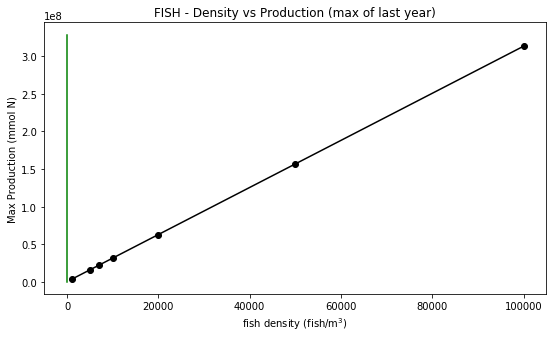

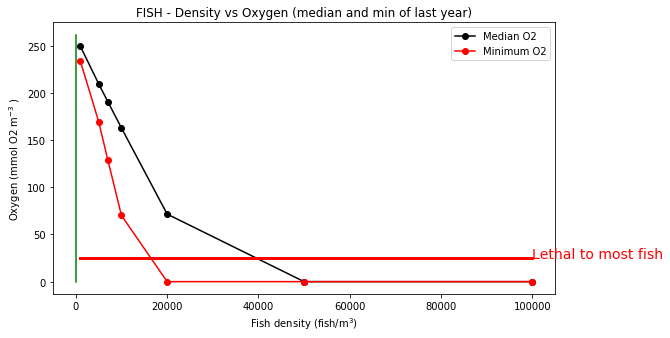

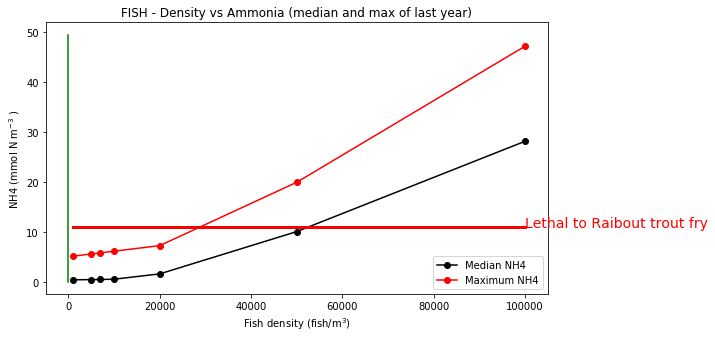

In [7]:
import model_NPZD2_SHELLE_openBoundary_withForcing_fishMacroalgae as model
import forcing
import plot_experiment as pexp
import pickle

experiment_name = 'Exp1_Embayment_trout'

days, dt, par, InitCond = model.load_defaults()

days = 365 * 1.5
forc = forcing.get(dt,days) # Load forcing

#------ Change the defaults ---------------
par['chi']  = 0.001 # No exchange of water in tank
par['X'] = 2000. # Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10. # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
InitCond['n_muss'] = 0.
InitCond['n_Algae']= 0.
# ----------------------------------------

Fish_levels = [1e3,5e3,7e3,1e4,2e4,5e4,1e5] # Units: number of mussels in tank (or bay)

multioutput = {}
for level in Fish_levels:
    InitCond['n_fish'] = float(level)
    multioutput[str(level)] = model.run(days,dt,InitCond,par,forc)
    
pickle.dump( multioutput, open( experiment_name + '.p', 'wb' ) )

print('Experiment is DONE!')

#%% Plotting ------------------------------------------
pexp.densityVSproductionFISH(multioutput,optimum=0.)
pexp.densityVSoxygenFISH(multioutput,optimum=0.)
pexp.densityVSammoniaFISH(multioutput,optimum=0.)

### Production Carrying Capacity

Looking at the 1st plot (Fish Density vs Production) you could think we can add more fish (i.e. we have not arrived to the carrying capacity). However, remember that our fish model is very simple and does not include limitations for Oxygen, Ammonia, etc., and fish will never run out of food because we feed them artificial food. Therefore, **with this model we cannot estimate Production Carrying Capacity**. Therefore we need to rely solely on the Ecosystem Carrying Capacity to advise for fish seeding densities. 

### Oxygen
In the second plot (Fish Density vs Production), you can see how you need to keep your initial fish seeding density at less than 19,000 fish/m$^3$ 


### Ammonia
In the third plot (Fish Density vs Ammonia), you can see how you need to keep your initial fish seeding density at less than 22,000 fish/m$^3$ 

### Ecosystem Carrying Capacity
Based on the combined seeding estimates using oxygen and ammonia, you want to stick with the smaller of the two numbers (i.e. 19,000 fish/m$^3$). If you pick the larger number, you will run into problems with low oxygen (i.e. fish in your embayment could start to die).

Now lets see if we can add mussels and kelp to mitigate the impact of fish on oxygen and ammonia...

---------------------

# Experiment 2: Embayment with trout, mussels and kelp (Multi-Trophic Integrated Aquaculture)

Here we'll ad mussels and kelp to the embayment with the intention of remediating some the environmental impacts that the trout farm may be causing. In particular, we want to see of adding mussels and kelp increases the oxygen concentration and lowers the ammonia concentration in the embayment.

Compute the **Production Carrying Capacity** and **Ecological Carrying Capacity** on the following case study.

The physical dimensions of the embayment are the same as Experiment 1:

* Length: 2000 m
* Width: 100 m
* Depth: 10 m

Also, the exchange rate with the open ocean is the same as Experiment 1...

* Exchange rate: 0.001 (units: replacement of embayment volume per day)

However, the number of trouts, mussels and kelps are now as follows:

* Trout: Varies (because we want to estimate the Carrying Capacities)
* Mussels: 1e4
* Kelp: 1e6

Make a new file named <span class="file">Exp2_Embayment_Trout_Mussels_Kelp.py</span>, save it in your working directory, add the code to run your experiment and <span class="run"></span> it.

<div class="Q"><br>

Experiment 2:<br><br>

Copy-paste your 3 graphs: (1) FISH - Density vs Production, (2) FISH - Density vs Oxygen and (3) FISH - Density vs Ammonia.<br><br>

- Make sure your graphs have enough points (and appropriate range) to estimate the different carrying capacities<br>
- Make sure your graphs have x and y labels with correct units


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

What is the approximate <b>Production Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Based on the effect of fish density on <b>Oxygen concentration</b>, what is the maximum fish density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Based on the effect of fish density on <b>Ammonia concentration</b>, what is the maximum fish density that you can grow in this scenario without causing "unacceptable" ecological impacts?


<br><br>

Note: Include units in your answer
<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Taking in consideration both oxygen and ammonia, what is the approximate <b>Ecological Carrying Capacity</b> for this scenario?


<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Putting all together... what would you recommended as the <b>fish Density</b> to use in this scenario, after taking in consideration the effect of fish density on all variables (i.e. production, oxygen and ammonia)?

<br><br>

Note: Include units in your answer

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Experiment 2:<br><br>

Compared to experiment 1, did adding mussels and kelp increased the ecological carrying capacity?

<br><br><div class="qhelp"></div></div>

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [1]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
style = open("../css/custom.css", "r").read()
HTML(style)